In [1]:
#IMPORT LIBRARIES TO OBTAIN DATA

from sqlalchemy import create_engine
import pymysql
import pandas as pd

In [2]:
#OBTAIN DATAFRAME FROM DATABASE USING SQL (STRUCTURED QUERY LANGUAGE)

connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [3]:
#CALL DATAFRAME

df = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
#NAME DATAFRAME

credit = df

In [5]:
#OBSERVE FIRST 5 ROWS

credit.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [6]:
#HIGH LEVEL INFO ABOUT DATA
#Note: X2 column shows 3 unique values, should be either Male Or Female only

credit.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670,...,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


In [7]:
#DATA TYPE/NULL VALUES

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      3670 non-null   object
 1   X2      3670 non-null   object
 2   X3      3670 non-null   object
 3   X4      3670 non-null   object
 4   X5      3670 non-null   object
 5   X6      3670 non-null   object
 6   X7      3670 non-null   object
 7   X8      3670 non-null   object
 8   X9      3670 non-null   object
 9   X10     3670 non-null   object
 10  X11     3670 non-null   object
 11  X12     3670 non-null   object
 12  X13     3670 non-null   object
 13  X14     3670 non-null   object
 14  X15     3670 non-null   object
 15  X16     3670 non-null   object
 16  X17     3670 non-null   object
 17  X18     3670 non-null   object
 18  X19     3670 non-null   object
 19  X20     3670 non-null   object
 20  X21     3670 non-null   object
 21  X22     3670 non-null   object
 22  X23     3670 non-null   

In [8]:
#RESET HEADER

credit.columns = credit.iloc[0]
credit = credit.reindex(credit.index.drop(0)).reset_index(drop=True)
credit.columns.name = None
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [9]:
#INVESTIGATE UNIQUE VALUE IN 'SEX' COLUMN

credit['SEX'].unique()

array(['female', 'male', 'SEX'], dtype=object)

In [10]:
credit[credit['SEX'] == 'SEX']

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2397,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [11]:
#DROP DUPLICATE HEADER ROW

credit = credit.drop(2397)
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 0 to 3668
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   3668 non-null   object
 1   SEX                         3668 non-null   object
 2   EDUCATION                   3668 non-null   object
 3   MARRIAGE                    3668 non-null   object
 4   AGE                         3668 non-null   object
 5   PAY_0                       3668 non-null   object
 6   PAY_2                       3668 non-null   object
 7   PAY_3                       3668 non-null   object
 8   PAY_4                       3668 non-null   object
 9   PAY_5                       3668 non-null   object
 10  PAY_6                       3668 non-null   object
 11  BILL_AMT1                   3668 non-null   object
 12  BILL_AMT2                   3668 non-null   object
 13  BILL_AMT3                   3668 non-null   obje

In [12]:
#DROP DUPLICATE ROWS

credit = credit.drop_duplicates()

In [13]:
#CHECK CURRENT INFO

credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 2396
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2396 non-null   object
 1   SEX                         2396 non-null   object
 2   EDUCATION                   2396 non-null   object
 3   MARRIAGE                    2396 non-null   object
 4   AGE                         2396 non-null   object
 5   PAY_0                       2396 non-null   object
 6   PAY_2                       2396 non-null   object
 7   PAY_3                       2396 non-null   object
 8   PAY_4                       2396 non-null   object
 9   PAY_5                       2396 non-null   object
 10  PAY_6                       2396 non-null   object
 11  BILL_AMT1                   2396 non-null   object
 12  BILL_AMT2                   2396 non-null   object
 13  BILL_AMT3                   2396 non-null   obje

In [14]:
#RENAME COLUMNS

credit.columns= ['Limit_Bal', 
                 'Sex', 
                 'Education', 
                 'Marriage', 
                 'Age', 
                 'Status_Sept', 
                 'Status_Aug', 
                 'Status_Jul', 
                 'Status_Jun', 
                 'Status_May', 
                 'Status_Apr', 
                 'Bill_Sept', 
                 'Bill_Aug', 
                 'Bill_Jul', 
                 'Bill_Jun', 
                 'Bill_May', 
                 'Bill_Apr', 
                 'Pay_Sept', 
                 'Pay_Aug', 
                 'Pay_Jul', 
                 'Pay_Jun', 
                 'Pay_May', 
                 'Pay_Apr', 
                 'Default_Status']

In [15]:
credit.head()

,Limit_Bal,Sex,Education,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default_Status
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [16]:
#WRITE CLEANED DATA TO NEW CSV FILE

credit.to_csv('credit1.csv')

In [17]:
#IMPORT HELPFUL LIBRARIES

import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [18]:
#IMPORT CLEANED DATAFRAME

credit1 = pd.read_csv('credit1.csv')

In [19]:
#OBSERVE FIRST 5 ROWS

credit1.head()

,Unnamed: 0,Limit_Bal,Sex,Education,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default_Status
0,0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,1,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,2,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,3,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,4,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [20]:
#DROP NEW UNNAMED COLUMN

credit1.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
credit1.head()

,Limit_Bal,Sex,Education,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default_Status
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [22]:
#CHECK DATA TYPES

credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Limit_Bal       2396 non-null   int64 
 1   Sex             2396 non-null   object
 2   Education       2396 non-null   object
 3   Marriage        2396 non-null   int64 
 4   Age             2396 non-null   int64 
 5   Status_Sept     2396 non-null   int64 
 6   Status_Aug      2396 non-null   int64 
 7   Status_Jul      2396 non-null   int64 
 8   Status_Jun      2396 non-null   int64 
 9   Status_May      2396 non-null   int64 
 10  Status_Apr      2396 non-null   int64 
 11  Bill_Sept       2396 non-null   int64 
 12  Bill_Aug        2396 non-null   int64 
 13  Bill_Jul        2396 non-null   int64 
 14  Bill_Jun        2396 non-null   int64 
 15  Bill_May        2396 non-null   int64 
 16  Bill_Apr        2396 non-null   int64 
 17  Pay_Sept        2396 non-null   int64 
 18  Pay_Aug 

In [23]:
#RUN A PANDAS PROFILING REPORT FOR HELPFUL INFO

#pandas_profiling.ProfileReport(credit1)

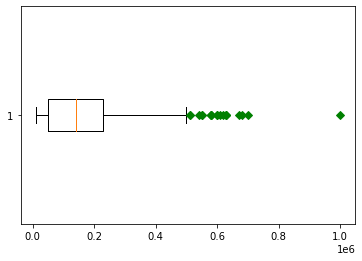

In [24]:
#VISUALIZING LIMIT BALANCE W/BOX PLOT
#Shows bulk of data to be btwn roughly 10,000-240,000

LB = credit1['Limit_Bal']
plt.boxplot(LB,0,'gD',vert=False)
plt.show()

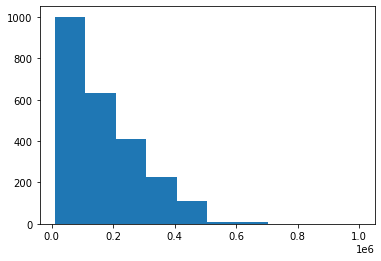

In [25]:
#VISUALIZING LIMIT BALANCE W/HISTOGRAM

plt.hist(credit1['Limit_Bal'])
plt.show()

In [26]:
#OBSERVE OUTLIERS BY EXPORTING COUNT OF LIMIT BALANCE OBSERVATIONS
#Using Xcel to Observe Counts

counts1 = credit1.groupby('Limit_Bal')['Limit_Bal'].count()

In [27]:
#counts1.to_csv('counts1.csv')

###Out of the 2,396 observations, only 20 have a limit balance of over 500,000, .8% of total observations. Only one obseravtion
exists with a 1,000,000 Limit

In [28]:
credit1[credit1['Limit_Bal'] == 1000000]

,Limit_Bal,Sex,Education,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,...,Bill_Jun,Bill_May,Bill_Apr,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default_Status
2196,1000000,female,graduate school,1,47,0,0,0,-1,0,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,not default


In [29]:
#I ELECTED TO NOT DROP THE SINGLE 1,000,000 OBSERVATION BECAUSE I THINK BINNING WILL ELIMINATE ANY POSSIBLE SKEWING

#credit1 = credit1.drop(2196)

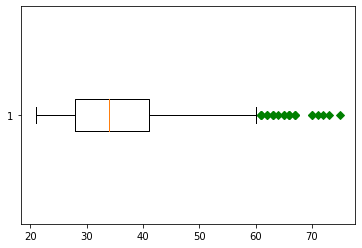

In [30]:
#VISUALIZING AGE W/BOXPLOT

Age = credit1['Age']
plt.boxplot(Age,0,'gD',vert=False)
plt.show()

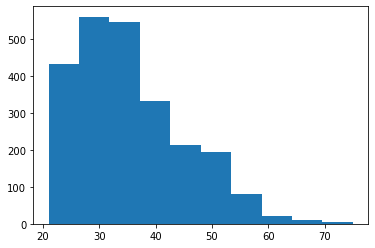

In [31]:
#VISUALIZING AGE W/HISTOGRAM

plt.hist(credit1['Age'])
plt.show()

In [32]:
#OBSERVE OUTLIERS BY EXPORTING COUNT OF AGE OBSERVATIONS
#Using Xcel to Observe Counts

ages1 = credit1.groupby('Age')['Age'].count()

In [33]:
#ages1.to_csv('ages1.csv')

###Out of the 2,395 observations, only 25 are aged over 60, 1% of Total observations

In [34]:
#CREATE DUMMY COLUMNS BASED ON OUR CATEGORICAL(OBJECT) COLUMNS
#This is to allow Machine Learning to have all Numeriacal Data, allowing for effective modeling

credit1 = pd.get_dummies(credit1, columns=['Sex', 'Education'])

In [35]:
credit1 = pd.get_dummies(credit1, columns=['Default_Status'])

In [36]:
credit1.head(20)

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1
5,50000,2,37,0,0,0,0,0,0,64400,...,1000,800,0,1,1,0,0,0,0,1
6,500000,2,29,0,0,0,0,0,0,367965,...,13750,13770,0,1,1,0,0,0,0,1
7,100000,2,23,0,-1,-1,0,0,-1,11876,...,1687,1542,1,0,0,0,0,1,0,1
8,140000,1,28,0,0,2,0,0,0,11285,...,1000,1000,1,0,0,1,0,0,0,1
9,20000,2,35,-2,-2,-2,-2,-1,-1,0,...,1122,0,0,1,0,1,0,0,0,1


In [37]:
credit1.describe()

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,4984.977880,5149.928631,0.577629,0.422371,0.379382,0.163606,0.007513,0.449499,0.216611,0.783389
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,16896.223773,20076.659470,0.494040,0.494040,0.485335,0.369995,0.086367,0.497547,0.412021,0.412021
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,247.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,1500.000000,1328.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,4000.000000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,332000.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##DISCRETIZE AGE, LIMIT BALANCE
##CARRY OVER BAR GRAPHS FROM PREVIOUS NOTEBOOK
##BEGIN TASK 3 WITH NEW CLEANED DATA

In [38]:
#DISCTRETIZ AGE BY DECADE

age_labels = ['10','20', '30', '40', '50', '60', '70']
age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
credit1['Age_Decade'] = pd.cut(credit1['Age'], bins=age_bins, labels=age_labels)

In [39]:
credit1.head()

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default,Age_Decade
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,1,0,0,0,0,1,1,0,20
1,120000,2,26,-1,2,0,0,0,2,2682,...,2000,1,0,0,0,0,1,1,0,20
2,90000,2,34,0,0,0,0,0,0,29239,...,5000,1,0,0,0,0,1,0,1,30
3,50000,1,37,0,0,0,0,0,0,46990,...,1000,1,0,0,0,0,1,0,1,30
4,50000,1,57,-1,0,-1,0,0,0,8617,...,679,0,1,0,0,0,1,0,1,50


In [40]:
#DISCRETICE LIMIT BALANCE AMOUNT BY $50,000 INCREMENTS

LB_labels = ['10K','10-50K', '50-100K', '100-150K', '150-200K', '200-250K', '250-300K','300K+']
LB_bins = [0, 10000, 50000, 100000, 150000, 200000, 250000, 300000, 700000]
credit1['Limit_Bins'] = pd.cut(credit1['Limit_Bal'], bins=LB_bins, labels=LB_labels)

In [41]:
credit1.head()

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default,Age_Decade,Limit_Bins
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,1,0,0,0,0,1,1,0,20,10-50K
1,120000,2,26,-1,2,0,0,0,2,2682,...,1,0,0,0,0,1,1,0,20,100-150K
2,90000,2,34,0,0,0,0,0,0,29239,...,1,0,0,0,0,1,0,1,30,50-100K
3,50000,1,37,0,0,0,0,0,0,46990,...,1,0,0,0,0,1,0,1,30,10-50K
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,1,0,0,0,1,0,1,50,10-50K


In [42]:
#lOOKING AT POSSINBLE LIMIT BAL OUTLIERS
#I've decided that I will not treat these as outliers

poss_outliers = credit1[credit1['Limit_Bal'] >= 510000]
poss_outliers

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default,Age_Decade,Limit_Bins
12,630000,2,41,-1,0,-1,-1,-1,-1,12137,...,1,0,0,0,0,1,0,1,40,300K+
260,510000,2,29,0,0,0,0,0,0,78331,...,1,0,1,0,0,0,0,1,20,300K+
433,580000,1,36,0,0,0,0,0,0,159760,...,1,0,1,0,0,0,0,1,30,300K+
451,600000,1,53,2,2,0,0,0,0,467150,...,0,1,1,0,0,0,1,0,50,300K+
527,620000,1,45,2,2,0,0,0,0,160837,...,1,0,0,0,0,1,1,0,40,300K+
555,630000,1,47,0,0,0,-1,-1,-2,37850,...,1,0,0,0,0,1,0,1,40,300K+
737,610000,2,31,0,0,0,0,0,0,142764,...,1,0,1,0,0,0,0,1,30,300K+
765,510000,2,35,-1,0,0,0,0,-1,2115,...,1,0,1,0,0,0,0,1,30,300K+
811,700000,1,39,0,0,0,0,-2,-1,99259,...,1,0,1,0,0,0,0,1,30,300K+
1095,670000,2,29,0,0,0,0,0,0,244663,...,0,1,1,0,0,0,0,1,20,300K+


In [43]:
#INVESTIGATING DATA FRAM BY GENDER
#

credit1.groupby('Sex_female')['Sex_female'].count()

Sex_female
0    1012
1    1384
Name: Sex_female, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

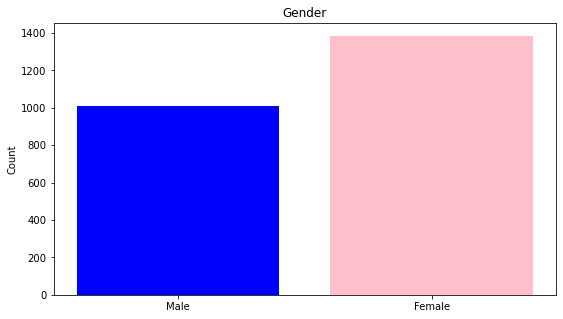

In [44]:
fig, ax = plt.subplots(figsize=(9, 5)) 
x= ['Male', 'Female']
y= [1012, 1384]
bar_labels = ['Male', 'Female']
bar_colors = ['blue', 'pink']

ax.bar(x, y, label=bar_labels, color=bar_colors)

ax.set_ylabel('Count')
ax.set_title('Gender')

plt.show

In [45]:
#INVESTIGATING DATA BY DEFAULT STATUS

credit1.groupby('Default_Status_default')['Default_Status_default'].count()

Default_Status_default
0    1877
1     519
Name: Default_Status_default, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

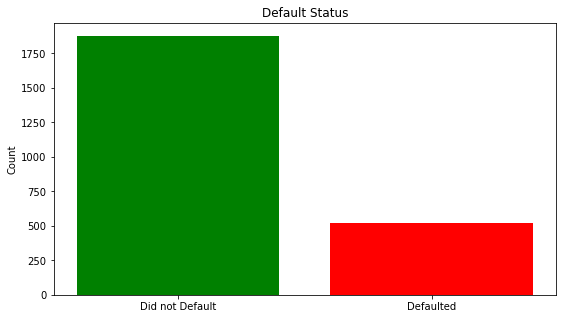

In [46]:
fig, ax = plt.subplots(figsize=(9, 5)) 
x= ['Did not Default', 'Defaulted']
y= [1877, 519]
bar_labels = ['Did not Default', 'Defaulted']
bar_colors = ['Green', 'Red']

ax.bar(x, y, label=bar_labels, color=bar_colors)

ax.set_ylabel('Count')
ax.set_title('Default Status')

plt.show

In [47]:
#DEFAULT STATUS BY GENDER

credit1.groupby(['Sex_female', 'Default_Status_default'])['Sex_female'].count()

Sex_female  Default_Status_default
0           0                          790
            1                          222
1           0                         1087
            1                          297
Name: Sex_female, dtype: int64

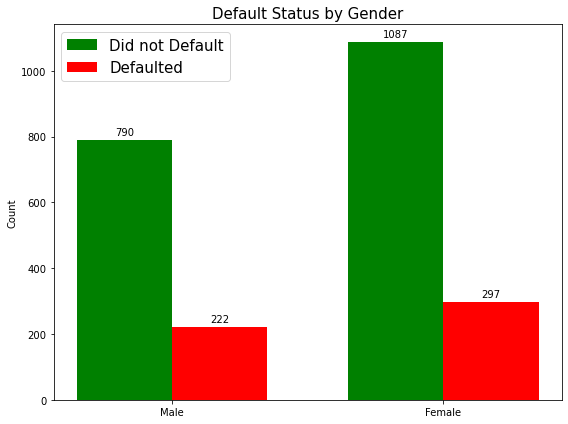

In [48]:
labels = ['Male', 'Female']

did_not_default = [790, 1087]
defaulted = [222, 297]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6)) 
rects1 = ax.bar(x - width/2, did_not_default, width, color='Green', label='Did not Default')
rects2 = ax.bar(x + width/2, defaulted, width, color='Red', label='Defaulted')

ax.set_ylabel('Count')
ax.set_title('Default Status by Gender', fontsize=15 )
ax.set_xticks(x, labels)
ax.legend(fontsize=15)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [49]:
#DEFAULT STATUS BY MARRIAGE

credit1.groupby(['Marriage', 'Default_Status_default'])['Marriage'].count()

Marriage  Default_Status_default
0         0                            6
1         0                          788
          1                          239
2         0                         1058
          1                          272
3         0                           25
          1                            8
Name: Marriage, dtype: int64

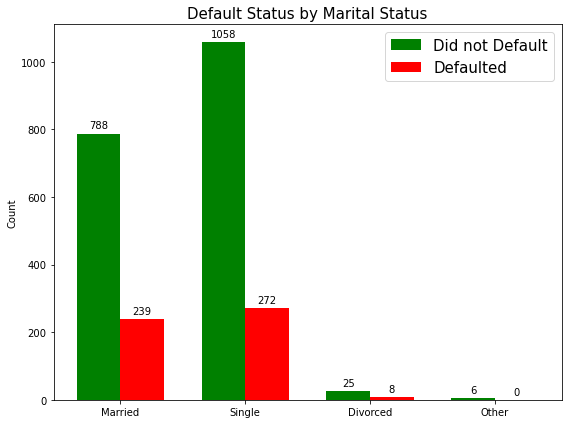

In [50]:
labels = ['Married', 'Single', 'Divorced', 'Other']

did_not_default = [788, 1058, 25, 6]
defaulted = [239, 272, 8, 0]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6)) 
rects1 = ax.bar(x - width/2, did_not_default, width, color='Green', label='Did not Default')
rects2 = ax.bar(x + width/2, defaulted, width, color='Red', label='Defaulted')

ax.set_ylabel('Count')
ax.set_title('Default Status by Marital Status', fontsize=15 )
ax.set_xticks(x, labels)
ax.legend(fontsize=15)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [51]:
#CREATING DATA FRAMES BASED ON EDUCATION LEVEL

High_School = credit1[credit1['Education_high school']==1]
University = credit1[credit1['Education_university']==1]
Graduate_School = credit1[credit1['Education_graduate school']==1]
Other = credit1[credit1['Education_other']==1]

In [52]:
#DEFAULT STATUS BY EDUCATION LEVEL

High_School.groupby('Default_Status_default')['Default_Status_default'].count()

Default_Status_default
0    291
1    101
Name: Default_Status_default, dtype: int64

In [53]:
University.groupby('Default_Status_default')['Default_Status_default'].count()

Default_Status_default
0    836
1    241
Name: Default_Status_default, dtype: int64

In [54]:
Graduate_School.groupby('Default_Status_default')['Default_Status_default'].count()

Default_Status_default
0    733
1    176
Name: Default_Status_default, dtype: int64

In [55]:
Other.groupby('Default_Status_default')['Default_Status_default'].count()

Default_Status_default
0    17
1     1
Name: Default_Status_default, dtype: int64

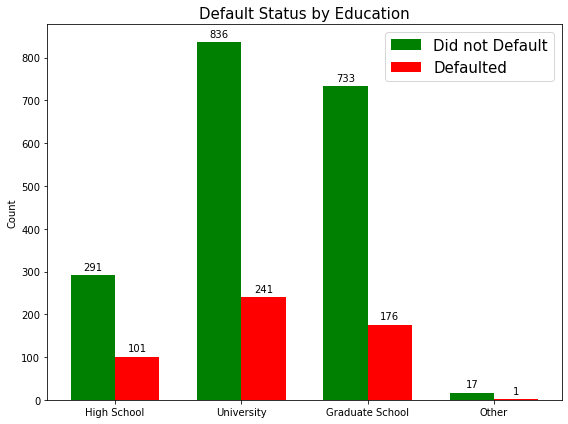

In [56]:
labels = ['High School', 'University', 'Graduate School', 'Other']

did_not_default = [291, 836, 733, 17]
defaulted = [101, 241, 176, 1]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6)) 
rects1 = ax.bar(x - width/2, did_not_default, width, color='Green', label='Did not Default')
rects2 = ax.bar(x + width/2, defaulted, width, color='Red', label='Defaulted')

ax.set_ylabel('Count')
ax.set_title('Default Status by Education', fontsize=15 )
ax.set_xticks(x, labels)
ax.legend(fontsize=15)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [57]:
credit1.groupby(['Limit_Bins', 'Default_Status_default'])['Limit_Bins'].count()

Limit_Bins  Default_Status_default
10K         0                          24
            1                          13
10-50K      0                         439
            1                         158
50-100K     0                         284
            1                          83
100-150K    0                         252
            1                          67
150-200K    0                         255
            1                          56
200-250K    0                         197
            1                          54
250-300K    0                         125
            1                          33
300K+       0                         300
            1                          55
Name: Limit_Bins, dtype: int64

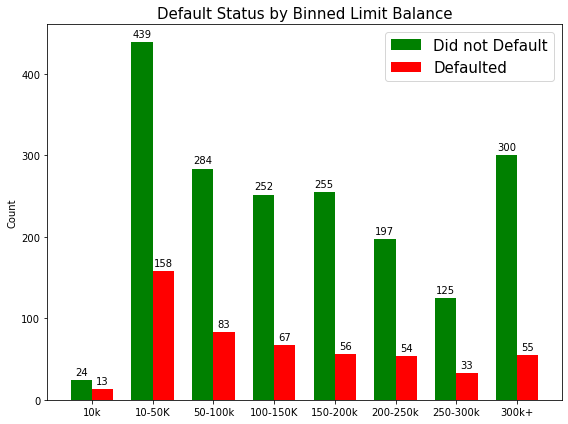

In [58]:
labels = ['10k', '10-50K', '50-100k', '100-150K', '150-200k', '200-250k', '250-300k', '300k+']

did_not_default = [24, 439, 284, 252, 255, 197, 125, 300]
defaulted = [13, 158, 83, 67, 56, 54, 33, 55]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6)) 
rects1 = ax.bar(x - width/2, did_not_default, width, color='Green', label='Did not Default')
rects2 = ax.bar(x + width/2, defaulted, width, color='Red', label='Defaulted')

ax.set_ylabel('Count')
ax.set_title('Default Status by Binned Limit Balance', fontsize=15 )
ax.set_xticks(x, labels)
ax.legend(fontsize=15)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [59]:
#PERCENTAGE OF LIMIT BINS DEFAULTED
#10K 35% DEFAULTED
#10-50k 26% DEFAULTED
#50-100K 22% DEFAULTED
#100-150K 21% DEFAULTED
#150-200K 18% DEFAULTED
#200-250k 22% DEFAULTED
#250-300K 21% DEFAULTED
#300K+ 15% DEFAULTED

In [60]:
#pandas_profiling.ProfileReport(credit1)

In [61]:
#DROPPED ALL COLUMNS RELATED TO PAYMENT STATUS, BILL AMOUNT, PAY AMOUNT

In [62]:
credit1.columns

Index(['Limit_Bal', 'Marriage', 'Age', 'Status_Sept', 'Status_Aug',
       'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Apr', 'Bill_Sept',
       'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'Pay_Sept',
       'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 'Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university', 'Default_Status_default',
       'Default_Status_not default', 'Age_Decade', 'Limit_Bins'],
      dtype='object')

In [63]:
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Limit_Bal                   2396 non-null   int64   
 1   Marriage                    2396 non-null   int64   
 2   Age                         2396 non-null   int64   
 3   Status_Sept                 2396 non-null   int64   
 4   Status_Aug                  2396 non-null   int64   
 5   Status_Jul                  2396 non-null   int64   
 6   Status_Jun                  2396 non-null   int64   
 7   Status_May                  2396 non-null   int64   
 8   Status_Apr                  2396 non-null   int64   
 9   Bill_Sept                   2396 non-null   int64   
 10  Bill_Aug                    2396 non-null   int64   
 11  Bill_Jul                    2396 non-null   int64   
 12  Bill_Jun                    2396 non-null   int64   
 13  Bill_May          

In [64]:
credit1.describe()

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,4984.977880,5149.928631,0.577629,0.422371,0.379382,0.163606,0.007513,0.449499,0.216611,0.783389
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,16896.223773,20076.659470,0.494040,0.494040,0.485335,0.369995,0.086367,0.497547,0.412021,0.412021
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,247.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,1500.000000,1328.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,4000.000000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,332000.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
credit1.head()

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default,Age_Decade,Limit_Bins
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,1,0,0,0,0,1,1,0,20,10-50K
1,120000,2,26,-1,2,0,0,0,2,2682,...,1,0,0,0,0,1,1,0,20,100-150K
2,90000,2,34,0,0,0,0,0,0,29239,...,1,0,0,0,0,1,0,1,30,50-100K
3,50000,1,37,0,0,0,0,0,0,46990,...,1,0,0,0,0,1,0,1,30,10-50K
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,1,0,0,0,1,0,1,50,10-50K


In [66]:
corrMat = credit1.corr()
print(corrMat)

                            Limit_Bal  Marriage       Age  Status_Sept  \
Limit_Bal                    1.000000 -0.147788  0.154974    -0.200540   
Marriage                    -0.147788  1.000000 -0.420270     0.025893   
Age                          0.154974 -0.420270  1.000000    -0.017835   
Status_Sept                 -0.200540  0.025893 -0.017835     1.000000   
Status_Aug                  -0.248233  0.037293 -0.029903     0.637668   
Status_Jul                  -0.236194  0.038955 -0.037790     0.547805   
Status_Jun                  -0.224340  0.046826 -0.024571     0.497509   
Status_May                  -0.213442  0.044533 -0.012634     0.472577   
Status_Apr                  -0.210881  0.041117 -0.009462     0.445626   
Bill_Sept                    0.361823 -0.040450  0.068263     0.171638   
Bill_Aug                     0.361342 -0.037658  0.061591     0.175226   
Bill_Jul                     0.365711 -0.047310  0.065932     0.173459   
Bill_Jun                     0.375659 

In [67]:
import seaborn as sns 

<AxesSubplot:>

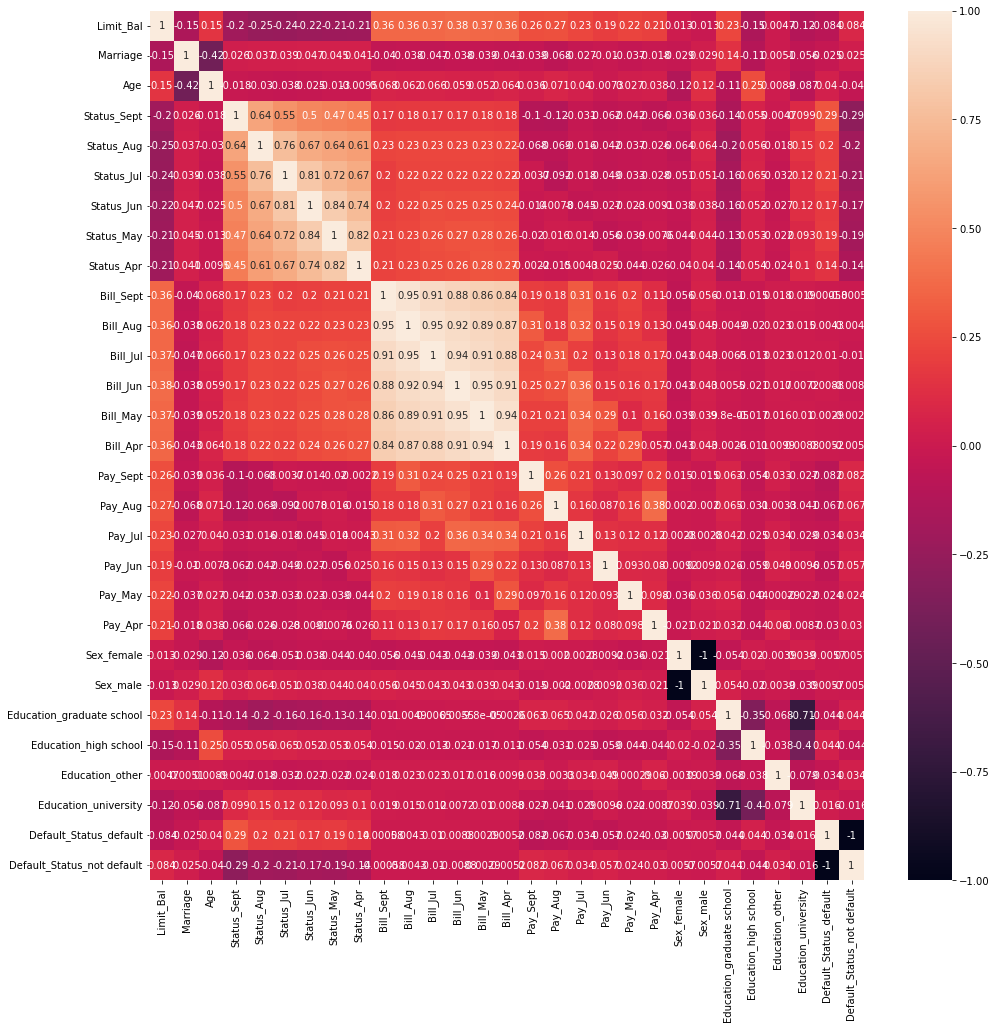

In [71]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corrMat, annot=True)

In [69]:
covMat = credit1.cov()
print(covMat)

                               Limit_Bal      Marriage            Age  \
Limit_Bal                   1.676861e+10 -10058.566644  189691.134493   
Marriage                   -1.005857e+04      0.276248      -2.087939   
Age                         1.896911e+05     -2.087939      89.346812   
Status_Sept                -2.917502e+04      0.015290      -0.189402   
Status_Aug                 -3.882758e+04      0.023676      -0.341421   
Status_Jul                 -3.815289e+04      0.025540      -0.445582   
Status_Jun                 -3.417397e+04      0.028952      -0.273211   
Status_May                 -3.197111e+04      0.027074      -0.138139   
Status_Apr                 -3.227379e+04      0.025541      -0.105708   
Bill_Sept                   3.648630e+09  -1655.601465   50246.908772   
Bill_Aug                    3.532902e+09  -1494.415030   43956.155322   
Bill_Jul                    3.297613e+09  -1731.488883   43395.642119   
Bill_Jun                    3.313588e+09  -1365.926

<AxesSubplot:>

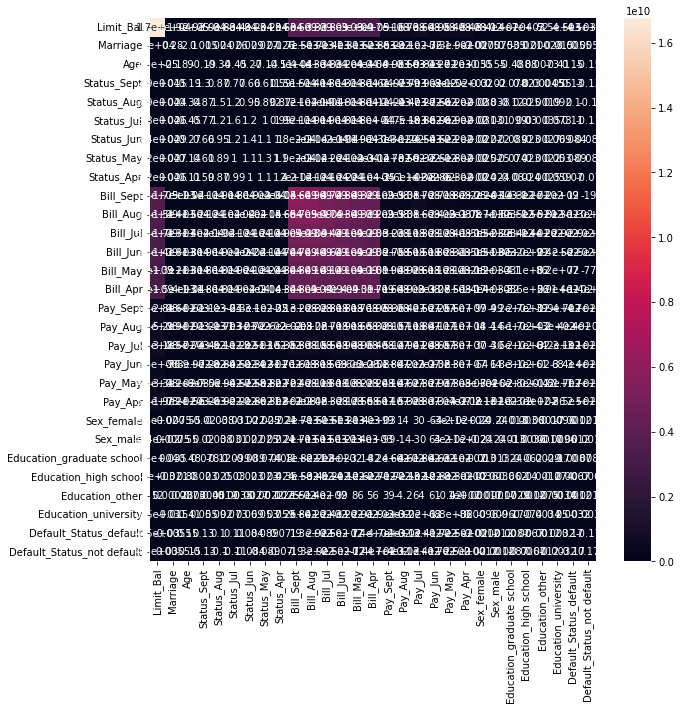

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(covMat, annot=True)

In [72]:
credit1.to_csv('credit2.csv')